In [1]:
import Pkg
Pkg.activate(".")

  Activating project at `~/Documents/programming/BME-574-2024`


In [2]:
Pkg.add(["Random","Images","Colors","MAT","LinearAlgebra"])

    Updating registry at `~/.julia/registries/JuliaComputingRegistry.toml`
    Updating registry at `~/.julia/registries/JuliaHubRegistry.toml`
   Resolving package versions...
  No Changes to `~/Documents/programming/BME-574-2024/Project.toml`
  No Changes to `~/Documents/programming/BME-574-2024/Manifest.toml`


In [64]:
using Random, Images, Colors, MAT, LinearAlgebra, Statistics, Plots

In [6]:
faces = matread("DATA/allFaces.mat")

Dict{String, Any} with 6 entries:
  "faces"  => [80.0 94.0 … 4.0 4.0; 81.0 87.0 … 4.0 3.0; … ; 14.0 9.0 … 1.0 0.0…
  "m"      => 168.0
  "sub"    => Dict{String, Any}("faces"=>[70.0 84.0 … 4.0 4.0; 74.0 83.0 … 4.0 …
  "nfaces" => [64.0 62.0 … 64.0 64.0]
  "person" => 38.0
  "n"      => 192.0

In [8]:
face_file = matopen("DATA/allFaces.mat")

MAT.MAT_v5.Matlabv5File(IOStream(<file DATA/allFaces.mat>), false, #undef)

In [9]:
keys(face_file)

KeySet for a Dict{String, Int64} with 6 entries. Keys:
  "faces"
  "m"
  "sub"
  "nfaces"
  "person"
  "n"

In [10]:
allfaces = read(face_file,"faces")

32256×2410 Matrix{Float64}:
 80.0  94.0  59.0  16.0  69.0  53.0  …  3.0  3.0  3.0  3.0  3.0  4.0  4.0
 81.0  87.0  67.0  14.0  67.0  52.0     3.0  2.0  3.0  4.0  4.0  4.0  3.0
 80.0  88.0  66.0  14.0  67.0  52.0     3.0  2.0  3.0  4.0  2.0  4.0  4.0
 79.0  87.0  74.0  15.0  69.0  50.0     3.0  4.0  2.0  2.0  3.0  4.0  4.0
 80.0  88.0  75.0  15.0  67.0  53.0     2.0  4.0  4.0  4.0  4.0  4.0  4.0
 82.0  86.0  76.0  15.0  70.0  53.0  …  4.0  4.0  3.0  5.0  3.0  3.0  5.0
 79.0  93.0  85.0  15.0  72.0  57.0     3.0  4.0  3.0  4.0  4.0  3.0  5.0
 80.0  92.0  91.0  17.0  70.0  54.0     3.0  4.0  4.0  3.0  3.0  3.0  4.0
 83.0  90.0  92.0  16.0  68.0  52.0     4.0  4.0  4.0  3.0  3.0  3.0  4.0
 82.0  89.0  92.0  15.0  68.0  52.0     3.0  4.0  3.0  3.0  3.0  3.0  3.0
 78.0  87.0  89.0  16.0  68.0  51.0  …  3.0  4.0  2.0  4.0  3.0  3.0  4.0
 81.0  86.0  88.0  16.0  69.0  51.0     3.0  3.0  3.0  3.0  3.0  3.0  3.0
 82.0  89.0  91.0  16.0  68.0  51.0     3.0  3.0  2.0  3.0  2.0  3.0  3.0
  ⋮       

In [11]:
faces["m"]

168.0

In [12]:
faces["n"]

192.0

In [38]:
nfaces = faces["nfaces"]

1×38 Matrix{Float64}:
 64.0  62.0  64.0  64.0  62.0  64.0  …  64.0  64.0  64.0  64.0  64.0  64.0

In [49]:
allPersonIdx = cumsum(Int64.(vec(nfaces))).+1
pushfirst!(allPersonIdx,1)
pop!(allPersonIdx)
allPersonIdx

38-element Vector{Int64}:
    1
   65
  127
  191
  255
  317
  381
  445
  509
  573
  637
  697
  756
    ⋮
 1643
 1707
 1771
 1835
 1899
 1963
 2027
 2091
 2155
 2219
 2283
 2347

In [13]:
168*192

32256

In [14]:
rand(3,4)

3×4 Matrix{Float64}:
 0.689562  0.299266  0.848726   0.7881
 0.956608  0.258148  0.0357914  0.0847495
 0.364329  0.687792  0.365992   0.763326

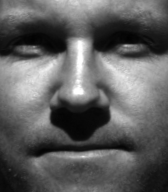

In [26]:
face = reshape(allfaces[:,129],(192,168)) ./ 255
Gray.(face)

In [50]:
different_faces = allfaces[:,allPersonIdx]

32256×38 Matrix{Float64}:
 80.0  86.0  80.0  64.0   10.0  57.0  …  30.0  43.0  71.0  78.0  33.0  70.0
 81.0  79.0  81.0  66.0    7.0  59.0     42.0  44.0  71.0  77.0  33.0  74.0
 80.0  77.0  80.0  66.0    7.0  58.0     60.0  41.0  70.0  76.0  32.0  69.0
 79.0  74.0  79.0  65.0    5.0  60.0     77.0  42.0  69.0  76.0  31.0  72.0
 80.0  72.0  78.0  66.0    5.0  59.0     80.0  44.0  69.0  76.0  30.0  70.0
 82.0  71.0  79.0  65.0    6.0  60.0  …  78.0  46.0  68.0  77.0  31.0  72.0
 79.0  68.0  78.0  66.0   11.0  60.0     82.0  50.0  65.0  78.0  28.0  74.0
 80.0  60.0  78.0  67.0   20.0  61.0     91.0  46.0  65.0  76.0  26.0  71.0
 83.0  59.0  77.0  67.0   28.0  62.0     98.0  47.0  63.0  76.0  25.0  73.0
 82.0  49.0  76.0  63.0   35.0  62.0     97.0  49.0  59.0  77.0  24.0  68.0
 78.0  42.0  78.0  62.0   49.0  60.0  …  93.0  50.0  58.0  74.0  22.0  67.0
 81.0  36.0  78.0  63.0   64.0  60.0     91.0  50.0  53.0  77.0  21.0  69.0
 82.0  38.0  76.0  62.0   69.0  58.0     87.0  49.0  45.0  76.

In [51]:
allPersons = zeros(6*192,6*168)
for i in 0:5
    for j in 0:5
        this_face = reshape(different_faces[:,j+1+6*i],(192,168))
        allPersons[i*192+1:(i+1)*192,j*168+1:(j+1)*168] = this_face
    end
end

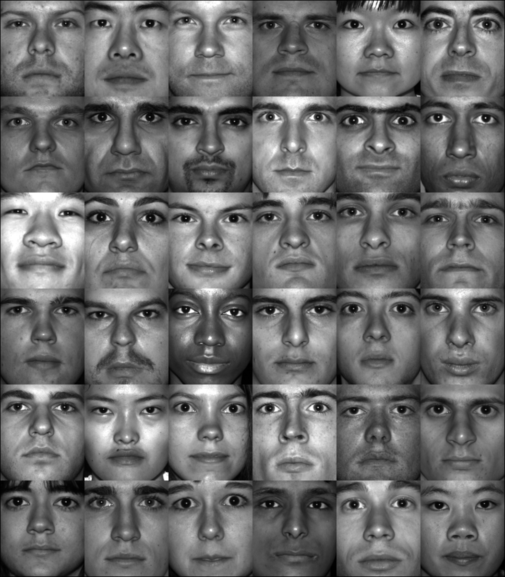

In [52]:
Gray.(allPersons./255)

In [53]:
training_faces = different_faces[:,1:36]

32256×36 Matrix{Float64}:
 80.0  86.0  80.0  64.0   10.0  57.0  …   4.0  71.0  30.0  43.0  71.0  78.0
 81.0  79.0  81.0  66.0    7.0  59.0      3.0  70.0  42.0  44.0  71.0  77.0
 80.0  77.0  80.0  66.0    7.0  58.0      3.0  70.0  60.0  41.0  70.0  76.0
 79.0  74.0  79.0  65.0    5.0  60.0      3.0  74.0  77.0  42.0  69.0  76.0
 80.0  72.0  78.0  66.0    5.0  59.0      3.0  76.0  80.0  44.0  69.0  76.0
 82.0  71.0  79.0  65.0    6.0  60.0  …   3.0  73.0  78.0  46.0  68.0  77.0
 79.0  68.0  78.0  66.0   11.0  60.0      3.0  74.0  82.0  50.0  65.0  78.0
 80.0  60.0  78.0  67.0   20.0  61.0      3.0  74.0  91.0  46.0  65.0  76.0
 83.0  59.0  77.0  67.0   28.0  62.0      4.0  75.0  98.0  47.0  63.0  76.0
 82.0  49.0  76.0  63.0   35.0  62.0      4.0  72.0  97.0  49.0  59.0  77.0
 78.0  42.0  78.0  62.0   49.0  60.0  …   4.0  69.0  93.0  50.0  58.0  74.0
 81.0  36.0  78.0  63.0   64.0  60.0      3.0  67.0  91.0  50.0  53.0  77.0
 82.0  38.0  76.0  62.0   69.0  58.0      3.0  63.0  87.0  49.

In [57]:
tf_mean = mean(training_faces,dims=1)

1×36 Matrix{Float64}:
 114.591  119.266  132.708  87.8965  …  112.656  71.2201  119.497  98.5124

In [58]:
training_faces_norm = training_faces .- tf_mean

32256×36 Matrix{Float64}:
  -34.5914  -33.2657   -52.7079  -23.8965  …  -28.2201  -48.4973  -20.5124
  -33.5914  -40.2657   -51.7079  -21.8965     -27.2201  -48.4973  -21.5124
  -34.5914  -42.2657   -52.7079  -21.8965     -30.2201  -49.4973  -22.5124
  -35.5914  -45.2657   -53.7079  -22.8965     -29.2201  -50.4973  -22.5124
  -34.5914  -47.2657   -54.7079  -21.8965     -27.2201  -50.4973  -22.5124
  -32.5914  -48.2657   -53.7079  -22.8965  …  -25.2201  -51.4973  -21.5124
  -35.5914  -51.2657   -54.7079  -21.8965     -21.2201  -54.4973  -20.5124
  -34.5914  -59.2657   -54.7079  -20.8965     -25.2201  -54.4973  -22.5124
  -31.5914  -60.2657   -55.7079  -20.8965     -24.2201  -56.4973  -22.5124
  -32.5914  -70.2657   -56.7079  -24.8965     -22.2201  -60.4973  -21.5124
  -36.5914  -77.2657   -54.7079  -25.8965  …  -21.2201  -61.4973  -24.5124
  -33.5914  -83.2657   -54.7079  -24.8965     -21.2201  -66.4973  -21.5124
  -32.5914  -81.2657   -56.7079  -25.8965     -22.2201  -74.4973  -22.5124

In [61]:
mean(training_faces_norm,dims=1)

1×36 Matrix{Float64}:
 9.92504e-15  2.97751e-14  -8.34606e-15  …  2.62788e-14  -9.02276e-16

In [62]:
u,s,v = svd(training_faces_norm)

SVD{Float64, Float64, Matrix{Float64}, Vector{Float64}}
U factor:
32256×36 Matrix{Float64}:
 -0.0086807    0.00605484  0.00631668   …  -0.00506411   0.001095
 -0.0085434    0.00647414  0.00639348      -0.00405687   0.00167744
 -0.00842134   0.00692799  0.0064359       -0.00482538   0.00156722
 -0.00829263   0.00760291  0.00691644      -0.00309499   0.00204418
 -0.00836431   0.00814122  0.00768321      -0.00127016   0.003589
 -0.00840955   0.00866206  0.00799469   …   0.000155067  0.000921095
 -0.00846378   0.00862421  0.00818843       0.00134974   0.00345619
 -0.00829812   0.00883551  0.00782016       6.62853e-5   0.00485761
 -0.00821634   0.00888327  0.00721732       0.000818759  0.00300457
 -0.00837028   0.00862001  0.00670343       0.00182351   0.00204059
 -0.00833026   0.00818214  0.00587116   …   0.00110971   0.00269977
 -0.00817494   0.00835979  0.00462071      -0.000648582  0.00240137
 -0.00825156   0.00836359  0.00354868      -0.00163733   0.00130343
  ⋮                        

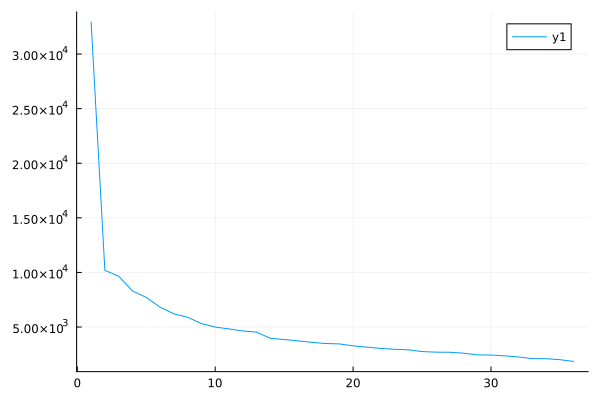

In [65]:
plot(s)

In [67]:
eigenface = reshape(u[:,1],(192,168))

192×168 Matrix{Float64}:
 -0.0086807   -0.00819924  -0.00768213  …  -0.00897783  -0.00927637
 -0.0085434   -0.00799341  -0.00764345     -0.00895643  -0.00928628
 -0.00842134  -0.00787248  -0.00751424     -0.00901887  -0.00935028
 -0.00829263  -0.00786772  -0.00751362     -0.00921681  -0.00939441
 -0.00836431  -0.00805921  -0.00767608     -0.0092709   -0.0093908
 -0.00840955  -0.00810503  -0.00771276  …  -0.0092405   -0.00941237
 -0.00846378  -0.0081602   -0.00773471     -0.00929065  -0.00947795
 -0.00829812  -0.00793505  -0.00765655     -0.00939363  -0.00948769
 -0.00821634  -0.00796824  -0.00771632     -0.00945169  -0.00951181
 -0.00837028  -0.00807631  -0.00784113     -0.00948985  -0.00958299
 -0.00833026  -0.00797631  -0.00781227  …  -0.00982745  -0.00987845
 -0.00817494  -0.00797437  -0.0078813      -0.00989086  -0.00997157
 -0.00825156  -0.00812667  -0.0081444      -0.0097856   -0.0100547
  ⋮                                     ⋱               
 -0.0112783   -0.0112695   -0.011323

In [69]:
minimum(eigenface)

-0.0162887427312167

In [70]:
maximum(eigenface)

0.016341497957671144

In [71]:
maximum(eigenface)-minimum(eigenface)

0.03263024068888784

In [76]:
eigenface_scaled = (eigenface .- minimum(eigenface))./0.03263024068888784

192×168 Matrix{Float64}:
 0.233159  0.247914  0.263762  0.277731  …  0.231536  0.224053  0.214904
 0.237367  0.254222  0.264947  0.278044     0.233204  0.224709  0.2146
 0.241108  0.257928  0.268907  0.281352     0.232835  0.222796  0.212639
 0.245052  0.258074  0.268926  0.279462     0.228466  0.216729  0.211287
 0.242856  0.252206  0.263947  0.27475      0.226443  0.215072  0.211397
 0.241469  0.250801  0.262823  0.273716  …  0.226736  0.216004  0.210736
 0.239807  0.249111  0.26215   0.27616      0.222925  0.214467  0.208726
 0.244884  0.256011  0.264546  0.271875     0.217667  0.211311  0.208428
 0.24739   0.254993  0.262714  0.265529     0.211549  0.209531  0.207689
 0.242672  0.251682  0.258889  0.265199     0.20714   0.208362  0.205507
 0.243899  0.254746  0.259774  0.264653  …  0.19895   0.198016  0.196453
 0.248659  0.254806  0.257658  0.261203     0.19858   0.196072  0.193599
 0.246311  0.250138  0.249595  0.250953     0.204244  0.199298  0.19105
 ⋮                           

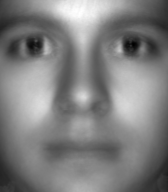

In [77]:
Gray.(eigenface_scaled)